In [1]:
import os
import requests
import os
import requests
from tqdm import tqdm

# download pdf
pdf_path = "./pdf_file/Effective-Python.pdf"

# create folder if it doesn't exist
folder_path = os.path.dirname(pdf_path)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# download pdf
if not os.path.exists(pdf_path):
    print(" [INFO] File not found, downloading...")

    # url of the pdf
    file_id = "1uMDv_hYh6AuNNtX0oRaUNkG4on-XT8SH"
    url = f"https://drive.google.com/uc?id={file_id}"
    response = requests.get(url, stream=True)
    
    file_name = pdf_path

    # check if the request was successful
    if response.status_code == 200:
        total_size = int(response.headers.get('content-length', 0))
        block_size = 1024  # 1 KB
        progress_bar = tqdm(total=total_size, unit='iB', unit_scale=True)

        with open(file_name, "wb") as file:
            for data in response.iter_content(block_size):
                progress_bar.update(len(data))
                file.write(data)
        
        progress_bar.close()
        print(f"[INFO] File downloaded successfully saved as {file_name}")
    else:
        print(f"[INFO] Failed to download file, status code: {response.status_code}")
else:
    print(f"[INFO] File already exists, skipping download")


[INFO] File already exists, skipping download


In [2]:
import fitz  # PyMuPDF
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    text = text.replace("\n", " ").strip()
    # text = text.replace("\x0c", "")
    return text

def open_and_read_pdf(pdf_path: str) -> str:
    doc = fitz.open(pdf_path)
    pages_and_text = []
    for page_num, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_text.append({
            "page_num": page_num - 24,
            "page_char_count": len(text),
            "page_word_count": len(text.split(" ")),
            "page_setence_count": len(text.split(".")),
            "page_token_count": len(text)/4,
            "text": text
        })
    return pages_and_text

pages_and_text = open_and_read_pdf(pdf_path=pdf_path)
pages_and_text[:2]

/home/khuy/miniconda3/envs/rag/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
0it [00:00, ?it/s]

MuPDF error: library error: zlib error: incorrect header check

MuPDF error: format error: cmsOpenProfileFromMem failed



469it [00:00, 841.08it/s]


[{'page_num': -24,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_setence_count': 1,
  'page_token_count': 0.0,
  'text': ''},
 {'page_num': -23,
  'page_char_count': 3111,
  'page_word_count': 522,
  'page_setence_count': 27,
  'page_token_count': 777.75,
  'text': 'Praise for Effective Python “I have been recommending this book enthusiastically since the first edition  appeared in 2015. This new edition, updated and expanded for Python 3, is a  treasure trove of practical Python programming wisdom that can benefit pro- grammers of all experience levels.” —Wes McKinney, Creator of Python Pandas project, Director of Ursa Labs “If you’re coming from another language, this is your definitive guide to taking  full advantage of the unique features Python has to offer. I’ve been working with  Python for nearly twenty years and I still learned a bunch of useful tricks, espe- cially around newer features introduced by Python 3. Effective Python is crammed  with actionable advice, and

In [3]:
import random

random.sample(pages_and_text, k=3)

[{'page_num': 69,
  'page_char_count': 1630,
  'page_word_count': 275,
  'page_setence_count': 18,
  'page_token_count': 407.5,
  'text': "Item 17: Prefer defaultdict Over setdefault  71 get method and an assignment expression (which is available as of  Python 3.8): visits.setdefault('France', set()).add('Arles')  # Short if (japan := visits.get('Japan')) is None:       # Long     visits['Japan'] = japan = set() japan.add('Kyoto') print(visits) >>> {'Mexico': {'Tulum', 'Puerto Vallarta'},  'Japan': {'Kyoto', 'Hakone'},  'France': {'Arles'}} What about the situation when you do control creation of the dictio- nary being accessed? This is generally the case when you’re using a  dictionary instance to keep track of the internal state of a class, for  example. Here, I wrap the example above in a class with helper meth- ods to access the dynamic inner state stored in a dictionary: class Visits:     def __init__(self):         self.data = {}     def add(self, country, city):         city_set

In [4]:
import pandas as pd

df = pd.DataFrame(pages_and_text)
df.head()

,page_num,page_char_count,page_word_count,page_setence_count,page_token_count,text
0,-24,0,1,1,0.00,
1,-23,3111,522,27,777.75,Praise for Effective Python “I have been recom...
2,-22,825,135,8,206.25,“This is a great book for both novice and expe...
3,-21,31,4,1,7.75,Effective Python Second Edition
4,-20,34,5,1,8.50,This page intentionally left blank


In [5]:
df.describe().round(2)

,page_num,page_char_count,page_word_count,page_setence_count,page_token_count
count,469.00,469.00,469.00,469.00,469.00
mean,210.00,1609.13,305.98,15.61,402.28
std,135.53,440.60,86.72,7.10,110.15
min,-24.00,0.00,1.00,1.00,0.00
25%,93.00,1444.00,273.00,11.00,361.00
50%,210.00,1650.00,315.00,16.00,412.50
75%,327.00,1862.00,354.00,20.00,465.50
max,444.00,3111.00,540.00,49.00,777.75


In [6]:
from spacy.lang.en import English

nlp = English()

# Add a sentencizer pipeline
nlp.add_pipe("sentencizer")

# Create documnet instance as an example    
doc = nlp("This is a sentence. This is another sentence. This is the last sentence.")
assert len(list(doc.sents)) == 3

# Print out our sentences splits
list(doc.sents)


[This is a sentence., This is another sentence., This is the last sentence.]

In [7]:
pages_and_text[20]

{'page_num': -4,
 'page_char_count': 1364,
 'page_word_count': 253,
 'page_setence_count': 16,
 'page_token_count': 341.0,
 'text': 'xxii  Acknowledgments Greg Stein, and Ka-Ping Yee. I appreciate your tutelage and leader- ship. Python has an excellent community, and I feel lucky to be a part  of it. Thanks to my teammates over the years for letting me be the worst  player in the band. Thanks to Kevin Gibbs for helping me take risks.  Thanks to Ken Ashcraft, Ryan Barrett, and Jon McAlister for showing  me how it’s done. Thanks to Brad Fitzpatrick for taking it to the next  level. Thanks to Paul McDonald for being an amazing co-founder.  Thanks to Jeremy Ginsberg, Jack Hebert, John Skidgel, Evan   Martin,  Tony Chang, Troy Trimble, Tessa Pupius, and Dylan Lorimer for help- ing me learn. Thanks to Sagnik Nandy and Waleed Ojeil for your  mentorship. Thanks to the inspiring programming and engineering teachers  that I’ve had: Ben Chelf, Glenn Cowan, Vince Hugo, Russ Lewin, Jon  Stemmle, De

In [8]:
for item in tqdm(pages_and_text):
    item["sentencizer"] = list(nlp(item["text"]).sents)

    # Make sure all sentences are strings (the default type is spaCy datatype)
    item["sentencizer"] = [str(sent) for sent in item["sentencizer"]]
    
    # Count the sentences
    item["sentencizer_count"] = len(item["sentencizer"])

  0%|          | 0/469 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:01<00:00, 337.95it/s]


In [9]:
random.sample(pages_and_text, k=1)

[{'page_num': 77,
  'page_char_count': 1602,
  'page_word_count': 327,
  'page_setence_count': 7,
  'page_token_count': 400.5,
  'text': "Item 19: Never Unpack More Than Three Return Values  79 function to also calculate these statistics and return them in the  result tuple that is unpacked by the caller: def get_stats(numbers):     minimum = min(numbers)     maximum = max(numbers)     count = len(numbers)     average = sum(numbers) / count       sorted_numbers = sorted(numbers)     middle = count // 2     if count % 2 == 0:         lower = sorted_numbers[middle - 1]         upper = sorted_numbers[middle]         median = (lower + upper) / 2     else:         median = sorted_numbers[middle]       return minimum, maximum, average, median, count   minimum, maximum, average, median, count = get_stats(lengths)   print(f'Min: {minimum}, Max: {maximum}') print(f'Average: {average}, Median: {median}, Count {count}') >>> Min: 60, Max: 73 Average: 67.5, Median: 68.5, Count 10 There are two prob

In [10]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_num,page_char_count,page_word_count,page_setence_count,page_token_count,sentencizer_count
count,469.00,469.00,469.00,469.00,469.00,469.00
mean,210.00,1609.13,305.98,15.61,402.28,7.69
std,135.53,440.60,86.72,7.10,110.15,4.66
min,-24.00,0.00,1.00,1.00,0.00,0.00
25%,93.00,1444.00,273.00,11.00,361.00,4.00
50%,210.00,1650.00,315.00,16.00,412.50,7.00
75%,327.00,1862.00,354.00,20.00,465.50,11.00
max,444.00,3111.00,540.00,49.00,777.75,30.00


In [11]:
# Define split size to turn group of sentences into chunks
num_sentences_per_chunk = 10

# Create a function to split lists of texts recursively into chunks size
def split_list_of_texts_into_chunks(input_list: 'list[str]',
                                    slice_size: int=num_sentences_per_chunk) -> 'list[list[str]]':
    return [input_list[i:i + slice_size] for i in range(0, len(input_list), slice_size)]

test_list = list(range(25))
split_list_of_texts_into_chunks(input_list=test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [12]:
# Loop through all the sentences and split them into chunks
for item in tqdm(pages_and_text):
    item["sentencizer_chunks"] = split_list_of_texts_into_chunks(input_list=item["sentencizer"],
                                                                 slice_size=num_sentences_per_chunk)

    # Count the chunks
    item["sentencizer_chunks_count"] = len(item["sentencizer_chunks"])

100%|██████████| 469/469 [00:00<00:00, 610719.83it/s]


In [13]:
random.sample(pages_and_text, k=1)

[{'page_num': 104,
  'page_char_count': 34,
  'page_word_count': 5,
  'page_setence_count': 1,
  'page_token_count': 8.5,
  'text': 'This page intentionally left blank',
  'sentencizer': ['This page intentionally left blank'],
  'sentencizer_count': 1,
  'sentencizer_chunks': [['This page intentionally left blank']],
  'sentencizer_chunks_count': 1}]

In [14]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_num,page_char_count,page_word_count,page_setence_count,page_token_count,sentencizer_count,sentencizer_chunks_count
count,469.00,469.00,469.00,469.00,469.00,469.00,469.00
mean,210.00,1609.13,305.98,15.61,402.28,7.69,1.26
std,135.53,440.60,86.72,7.10,110.15,4.66,0.46
min,-24.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,93.00,1444.00,273.00,11.00,361.00,4.00,1.00
50%,210.00,1650.00,315.00,16.00,412.50,7.00,1.00
75%,327.00,1862.00,354.00,20.00,465.50,11.00,2.00
max,444.00,3111.00,540.00,49.00,777.75,30.00,3.00


In [15]:
import re

# Split each chunk into its own item
pages_and_chunk = []
for item in tqdm(pages_and_text):
    for sentence_chunk in item["sentencizer_chunks"]:
        chunk_dict = {}
        chunk_dict["page_num"] = item["page_num"]

        # Join the sentences together into a paragraph-Like structure, aka join the list of sentences into one paragragh
        joined_sentence_chunk = "".join(sentence_chunk).replace(" ", " ").strip()
        joined_sentence_chunk = re.sub(r"\.([A-Z])", r". \1 ", joined_sentence_chunk)
    
        chunk_dict["sentence_chunk"] = joined_sentence_chunk      

        # Get some stats on our chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/4

        pages_and_chunk.append(chunk_dict)

len(pages_and_chunk)

100%|██████████| 469/469 [00:00<00:00, 28612.78it/s]


592

In [16]:
random.sample(pages_and_chunk, k=1)

[{'page_num': 292,
  'sentence_chunk': "294  Chapter 7 Concurrency and Parallelism NUMBERS = [     (1963309, 2265973), (2030677, 3814172),     (1551645, 2229620), (2039045, 2020802),     (1823712, 1924928), (2293129, 1020491),     (1281238, 2273782), (3823812, 4237281),     (3812741, 4729139), (1292391, 2123811), ]   def main():     start = time.time()     results = list(map(my_module.gcd, NUMBERS))     end = time.time()     delta = end - start     print(f'Took {delta:.3f} seconds')   if __name__ == '__main__':     main() >>> Took 1.173 seconds Running this code on multiple Python threads will yield no speed  improvement because the GIL prevents Python from using multiple  CPU cores in parallel. H ere, I do the same computation as above but  using the concurrent.futures module with its ThreadPoolExecutor  class and two worker threads (to match the number of CPU cores on  my computer): # run_threads.py import my_module from concurrent.futures import ThreadPoolExecutor import time   NUMB

In [17]:
df = pd.DataFrame(pages_and_chunk)
df.describe().round(2)

,page_num,chunk_char_count,chunk_word_count,chunk_token_count
count,592.00,592.00,592.00,592.00
mean,206.67,1277.55,245.37,319.39
std,136.90,538.06,109.58,134.52
min,-23.00,13.00,3.00,3.25
25%,84.00,970.00,179.00,242.50
50%,208.50,1451.50,271.00,362.88
75%,323.25,1660.25,320.00,415.06
max,442.00,2274.00,528.00,568.50


In [18]:
df.head()

,page_num,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-23,Praise for Effective Python “I have been recom...,1966,338,491.50
1,-23,Early sections lay out an enormous list of ti...,1151,191,287.75
2,-22,“This is a great book for both novice and expe...,828,138,207.00
3,-21,Effective Python Second Edition,31,4,7.75
4,-20,This page intentionally left blank,34,5,8.50


In [19]:
# Show random chunks with under 30 tokens in length
min_token_count = 30
for row in df[df["chunk_token_count"] <= min_token_count].sample(3).iterrows():
    print(f"Chunk token count: {row[1]['chunk_token_count']} | Text: {row[1]['sentence_chunk']}")

Chunk token count: 8.5 | Text: This page intentionally left blank
Chunk token count: 8.5 | Text: This page intentionally left blank
Chunk token count: 8.5 | Text: This page intentionally left blank


In [20]:
# Filter out chunks with less than 30 tokens
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_count].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_num': -23,
  'sentence_chunk': 'Praise for Effective Python “I have been recommending this book enthusiastically since the first edition  appeared in 2015. T his new edition, updated and expanded for Python 3, is a  treasure trove of practical Python programming wisdom that can benefit pro- grammers of all experience levels.” —Wes McKinney, Creator of Python Pandas project, Director of Ursa Labs “If you’re coming from another language, this is your definitive guide to taking  full advantage of the unique features Python has to offer. I ’ve been working with  Python for nearly twenty years and I still learned a bunch of useful tricks, espe- cially around newer features introduced by Python 3. E ffective Python is crammed  with actionable advice, and really helps define what our community means when  they talk about Pythonic code.” —Simon Willison, Co-creator of Django “I’ve been programming in Python for years and thought I knew it pretty well. Thanks to this treasure trove of t

In [21]:
random.sample(pages_and_chunks_over_min_token_len, k=1)

[{'page_num': 26,
  'sentence_chunk': "28  Chapter 1 Pythonic Thinking Things to Remember ✦ Python has special syntax called unpacking for assigning multiple  values in a single statement.✦ Unpacking is generalized in Python and can be applied to any    iterable, including many levels of iterables within iterables.✦ Reduce visual noise and increase code clarity by using unpacking  to avoid explicitly indexing into sequences. I tem 7: Prefer enumerate Over range The range built-in function is useful for loops that iterate over a set of  integers: from random import randint random_bits = 0 for i in range(32):     if randint(0, 1):         random_bits |= 1 << i print(bin(random_bits)) >>> 0b11101000100100000111000010000001 When you have a data structure to iterate over, like a list of strings,  you can loop directly over the sequence: flavor_list = ['vanilla', 'chocolate', 'pecan', 'strawberry'] for flavor in flavor_list:     print(f'{flavor} is delicious') >>> vanilla is delicious chocol

In [22]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2', 
                                      device='cuda')

# Create a list of sentences
sentences = ["The Sentences Transformer library provides an easy way to create embeddings",
             "Sentences can be embedded one by one or in a list",
             "I like a loli!"]


# Sentence are encoded/embedded by calling model.encode()
embeddings = embedding_model.encode(sentences)
embedding_dict = dict(zip(sentences, embeddings))

# See the embeddings
for sentence, embedding in embedding_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")
    print("")

/home/khuy/miniconda3/envs/rag/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Sentence: The Sentences Transformer library provides an easy way to create embeddings
Embedding: [-5.28019965e-01  2.76935875e-01  1.66682646e-01 -4.99300838e-01
 -4.50595230e-01  1.02246605e-01 -1.69473886e-01 -4.22899872e-01
 -9.89056900e-02  2.73091704e-01 -2.73043871e-01  1.58215359e-01
  5.06154001e-01  3.94771434e-02  1.14398256e-01  6.83269858e-01
 -1.21926703e-01  9.51975405e-01 -3.71360451e-01 -3.39380056e-01
  5.98491907e-01  6.77275583e-02 -9.10788849e-02 -3.96213144e-01
  4.23162639e-01  2.42336020e-01 -9.80029926e-02 -2.64273047e-01
  4.78841007e-01 -3.74096751e-01  2.12306872e-01  1.01060286e-01
  1.62076149e-02  2.82214195e-01 -3.17239702e-01  2.11349845e-01
 -9.52580571e-03  4.93187457e-01  7.81966373e-02 -4.38499331e-01
 -6.20878816e-01  2.42177546e-01  4.77256775e-02  1.54639125e-01
 -4.53824222e-01 -3.75485092e-01 -1.53278336e-01  1.63555056e-01
 -2.12470531e-01  8.36919695e-02  1.50495872e-01 -2.03052640e-01
 -6.92544818e-01  4.01901931e-01  7.41240829e-02  4.105060

In [25]:
embedding[3].shape

()

In [24]:
embedding = embedding_model.encode("My name is Huy")
embedding

array([-6.97848022e-01, -4.22759056e-01,  1.40992716e-01,  2.59156972e-01,
       -3.17302704e-01,  8.48606080e-02,  6.69486463e-01, -1.51416555e-01,
        4.61364597e-01,  4.75085899e-02,  3.76165479e-01, -8.77711296e-01,
        2.10038215e-01, -4.34886128e-01,  3.65725368e-01,  3.12652320e-01,
       -5.90708628e-02,  2.70454973e-01,  4.01783049e-01, -3.53956491e-01,
       -1.70771196e-01,  3.38983357e-01, -2.51613051e-01, -1.97145015e-01,
       -1.14410266e-01, -3.23854536e-01,  1.30846471e-01,  2.43274212e-01,
       -2.37540245e-01,  1.07821738e-02,  5.33223271e-01, -2.33666420e-01,
       -4.66601849e-02, -1.41759485e-01,  6.12891793e-01,  4.09107685e-01,
       -3.67978990e-01,  5.62870167e-02,  1.89594720e-02, -1.49151966e-01,
        9.17263776e-02, -1.01421177e+00, -6.44064695e-02, -4.90753889e-01,
       -4.52097565e-01, -3.51003021e-01, -1.91665366e-01,  4.38245060e-03,
        2.16074660e-01,  4.79411408e-02, -5.52976191e-01, -1.95870668e-01,
        5.11580445e-02,  

In [84]:
# %%time

# embedding_model.to("cpu")

# # Embed each chunk one by one
# for item in tqdm(pages_and_chunks_over_min_token_len):
#     item("embedding") = embedding_model.encode(item["sentence_chunk"])

In [26]:
%%time

embedding_model.to("cuda")

# Embed each chunk one by one
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

100%|██████████| 566/566 [00:03<00:00, 177.99it/s]

CPU times: user 3.29 s, sys: 71.8 ms, total: 3.36 s
Wall time: 3.18 s


In [27]:
%%time

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[19]

CPU times: user 88 μs, sys: 16 μs, total: 104 μs
Wall time: 108 μs


'Acknowledgments This book would not have been possible without the guidance,    support, and encouragement from many people in my life. T hanks to Scott Meyers for the Effective Software Development series. I first read Effective C++ when I was 15 years old and fell in love with  programming. T here’s no doubt that Scott’s books led to my academic  experience and first job. I ’m thrilled to have had the opportunity to  write this book. T hanks to my technical reviewers for the depth and thoroughness  of their feedback for the second edition of this book: Andy Chu, Nick  Cohron, Andrew Dolan, Asher Mancinelli, and Alex Martelli. T hanks  to my colleagues at Google for their review and input. W ithout all of  your help, this book would have been inscrutable. T hanks to everyone at Pearson involved in making this second edi- tion a reality. T hanks to my executive editor Debra Williams for being  supportive throughout the process.'

In [28]:
len(text_chunks)

566

In [29]:
%%time

# Embed all text in batches
text_chunk_embeddings = embedding_model.encode(text_chunks, 
                                                batch_size=32,
                                                convert_to_tensor=True)

text_chunk_embeddings

CPU times: user 1.24 s, sys: 55.9 ms, total: 1.29 s
Wall time: 414 ms


tensor([[-0.1837, -0.2976, -0.2767,  ...,  0.0495,  0.1300, -0.0759],
        [-0.3124, -0.2397, -0.2065,  ...,  0.0675,  0.0171,  0.1977],
        [-0.4339, -0.1966, -0.5498,  ...,  0.0177,  0.0442,  0.0412],
        ...,
        [-0.1458, -0.2577, -0.3330,  ...,  0.1451, -0.0771, -0.0794],
        [-0.2110, -0.2162, -0.1692,  ..., -0.3144,  0.0369,  0.2840],
        [-0.3092, -0.2422, -0.2290,  ..., -0.2776,  0.0433,  0.1171]],
       device='cuda:0')

In [30]:
pages_and_chunks_over_min_token_len[19]

{'page_num': -5,
 'sentence_chunk': 'Acknowledgments This book would not have been possible without the guidance,    support, and encouragement from many people in my life. T hanks to Scott Meyers for the Effective Software Development series. I first read Effective C++ when I was 15 years old and fell in love with  programming. T here’s no doubt that Scott’s books led to my academic  experience and first job. I ’m thrilled to have had the opportunity to  write this book. T hanks to my technical reviewers for the depth and thoroughness  of their feedback for the second edition of this book: Andy Chu, Nick  Cohron, Andrew Dolan, Asher Mancinelli, and Alex Martelli. T hanks  to my colleagues at Google for their review and input. W ithout all of  your help, this book would have been inscrutable. T hanks to everyone at Pearson involved in making this second edi- tion a reality. T hanks to my executive editor Debra Williams for being  supportive throughout the process.',
 'chunk_char_count'

In [31]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embedding_df_save_path = "./pdf_file/text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embedding_df_save_path, index=False)

In [32]:
# Import saved file and view 
text_chunks_and_embeddings_df = pd.read_csv(embedding_df_save_path)
text_chunks_and_embeddings_df.head()

,page_num,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-23,Praise for Effective Python “I have been recom...,1966,338,491.50,[-1.83700189e-01 -2.97621489e-01 -2.76668996e-...
1,-23,Early sections lay out an enormous list of ti...,1151,191,287.75,[-3.12382787e-01 -2.39667937e-01 -2.06482321e-...
2,-22,“This is a great book for both novice and expe...,828,138,207.00,[-0.43392628 -0.19659993 -0.5498485 -0.169921...
3,-18,Many of the designations used by manufacturers...,1755,273,438.75,[-3.72039527e-01 -6.10209070e-02 -3.58474433e-...
4,-18,com/permissions/. ISBN-13: 978-0-13-485398-7 I...,438,49,109.50,[-5.18725872e-01 -1.14726625e-01 -2.15647265e-...


In [33]:
import random

import torch
import numpy as np
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file_path = "./pdf_file/text_chunks_and_embeddings_df.csv"
# Import texts and embeddings df
text_chunks_and_embeddings_df = pd.read_csv(file_path)

# Convert embeddings column to np.arrays (it got convert to string when saved to csv)
text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df["embedding"].apply(lambda x: np.fromstring(x[1:-1], sep=" "))

# Convert our embeddings to torch tensors
embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].tolist(),  axis=0), dtype=torch.float32).to(device)

# Convert text and embeddings df to list of dicts
pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient="records")

text_chunks_and_embeddings_df

,page_num,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-23,Praise for Effective Python “I have been recom...,1966,338,491.50,"[-0.183700189, -0.297621489, -0.276668996, -0...."
1,-23,Early sections lay out an enormous list of ti...,1151,191,287.75,"[-0.312382787, -0.239667937, -0.206482321, -0...."
2,-22,“This is a great book for both novice and expe...,828,138,207.00,"[-0.43392628, -0.19659993, -0.5498485, -0.1699..."
3,-18,Many of the designations used by manufacturers...,1755,273,438.75,"[-0.372039527, -0.061020907, -0.358474433, -0...."
4,-18,com/permissions/. ISBN-13: 978-0-13-485398-7 I...,438,49,109.50,"[-0.518725872, -0.114726625, -0.215647265, -0...."
...,...,...,...,...,...,...
561,438,"440 Index itertools.dropwhile method, 139 ite...",2122,277,530.50,"[-0.0571396, -0.17752704, 0.05250219, -0.11262..."
562,439,"Index 441 multiprocessing built-in module, 2...",2118,284,529.50,"[-0.35778785, -0.07723718, -0.30885008, -0.087..."
563,440,"442 Index PyPI (Python Package Index), 389–3...",1949,274,487.25,"[-0.145763695, -0.257696718, -0.332957864, 0.1..."
564,441,"Index 443 catch-all unpacking versus, 48–52 ...",2054,279,513.50,"[-0.21104065, -0.21618026, -0.16923718, -0.030..."


In [34]:
embeddings.shape

torch.Size([566, 384])

In [35]:
device

device(type='cuda')

In [36]:
# Create model 
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2',
                                      device=device)

/home/khuy/miniconda3/envs/rag/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [55]:
# 1. Define our search query
search_query = "Python doesn’t have compile-time static type checking"
print(f"Search query: {search_query}")

# 2. Embed the search query
# Note: it's important to use the same device as the embeddings
search_query_embedding = embedding_model.encode(search_query, convert_to_tensor=True).to(device)

# 3. Get similarity scores with the dot product (use cosine similarity for larger datasets)
from time import perf_counter as timer

# Start timer
start_time = timer()
dot_scores = util.dot_score(a=search_query_embedding, b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds." )

# 4. Get the top_k most similar chunks
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Search query: Python doesn’t have compile-time static type checking
[INFO] Time taken to get scores on 566 embeddings: 0.00015 seconds.


torch.return_types.topk(
values=tensor([15.6056, 15.3930, 14.0089, 13.7844, 12.9353], device='cuda:0'),
indices=tensor([450, 449, 458, 465, 555], device='cuda:0'))

In [56]:
larger_embedding = torch.randn(embeddings.shape[0]*1000, embeddings.shape[1]).to(device)
print(f"Embedding shape: {larger_embedding.shape}")

# Perform dot product across 168.000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=search_query_embedding, b=larger_embedding)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {larger_embedding.shape[0]} embeddings: {end_time-start_time:.5f} seconds." )

Embedding shape: torch.Size([566000, 384])
[INFO] Time taken to get scores on 566000 embeddings: 0.00027 seconds.


In [57]:
pages_and_chunks[367]

{'page_num': 285,
 'sentence_chunk': 'tasks = []         for handle in handles:             coro = tail_async(handle, interval, write_async)             task = asyncio.create_task(coro)             tasks.append(task)           await asyncio.gather(*tasks) I can verify that run_tasks works as expected, too: input_paths = ... handles = ... output_path = ... asyncio.run(run_tasks(handles, 0.1, output_path))   confirm_merge(input_paths, output_path) It’s possible to continue this iterative refactoring pattern and convert  readline into an asynchronous coroutine as well. H owever, that func- tion requires so many blocking file I/O operations that it doesn’t seem  worth porting, given how much that would reduce the clarity of the  code and hurt performance. I n some situations, it makes sense to  move everything to asyncio, and in others it doesn’t. T he bottom-up approach to adopting coroutines has four steps that  are similar to the steps of the top-down style, but the process tra- verses 

In [58]:
# Define helper function to print wrapped text 
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [59]:
print(f"Search query: {search_query}")
print("Results:")

# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_num']}")
    print("\n")

Search query: Python doesn’t have compile-time static type checking
Results:
Score: 15.6056
Text:
But I have to wonder, why wasn’t the code more well tested before  the program was deployed to production?Compile-time static type  safety isn’t everything. Y ou should always test your code, regardless  of what language it’s written in. H owever, I’ll admit that in Python it  may be more important to write tests to verify correctness than in  other languages. L uckily, the same dynamic features that create risks  also make it extremely easy to write tests for your code and to debug  malfunctioning programs. Y ou can use Python’s dynamic nature and  easily overridable behaviors to implement tests and ensure that your  programs work as expected.
Page number: 351


Score: 15.3930
Text:
9 Testing and  Debugging Python doesn’t have compile-time static type checking. T here’s    nothing in the interpreter that will ensure that your program will  work correctly when you run it. P ython does supp

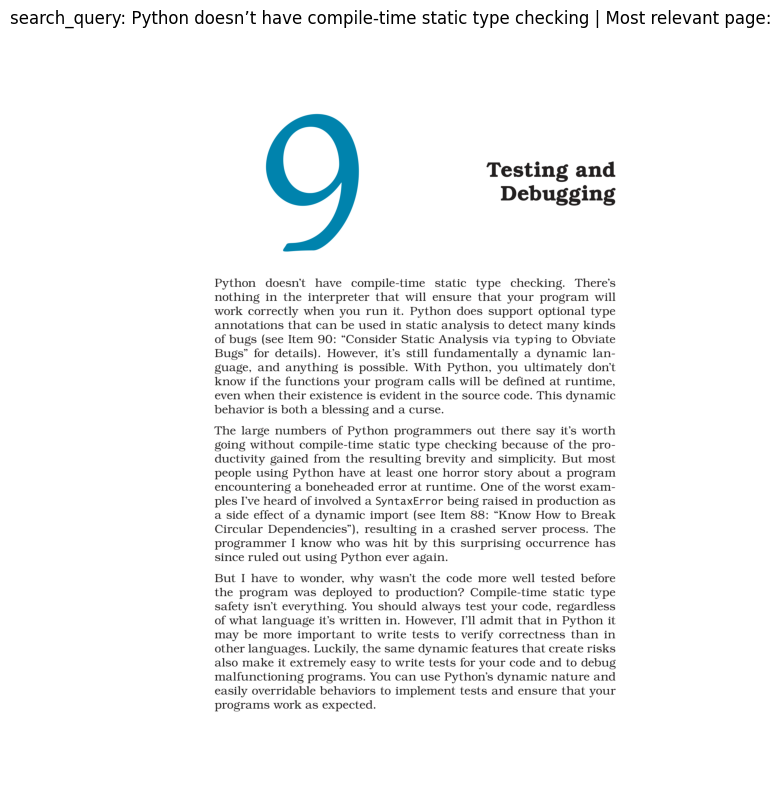

In [61]:
import fitz

# Open the PDF file and Load target
pdf_path = "./pdf_file/Effective-Python.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(351+24) # Note: page number of out PDF starts at 23+

# Get the image of the page
image = page.get_pixmap(dpi=300)

# Save image (optional)
# image.save("output_filename.png")
doc.close()

# Convert the pixmap to a numpy array
img_array = np.frombuffer(image.samples, dtype=np.uint8).reshape(image.height, image.width, image.n)

# Display the image
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"search_query: {search_query} | Most relevant page:")
plt.axis("off")
plt.show()

In [65]:
embedding[0]

-0.697848